In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv('../data/csv/bias.csv')

races = {1: 'White', 2: 'Black', 3: 'East Asian'}
filt_df = df[df['Race'].isin(races.keys())]

traits = ['Confident', 'Egotistic', 'Intelligent', 'Kind', 'Responsible', 'Trustworthy',
          'Aggressive', 'Caring', 'Emotional', 'Friendly', 'Sociable']


In [3]:
# Perform one-way ANOVA for each trait and record the results with respect to race
anova_results = {}
for trait in traits:
    grouped_data = []
    for race_key in races.keys():
        race_data = filt_df[filt_df['Race'] == race_key][trait]
        grouped_data.append(race_data)
    anova_results[trait] = (stats.f_oneway(*grouped_data).pvalue, races.values())

mean_values_races = {}
for trait in traits:
    trait_means = {}
    for race_key, race_name in races.items():
        race_data = filt_df[filt_df['Race'] == race_key][trait]
        trait_means[race_name] = race_data.mean()
    mean_values_races[trait] = trait_means


In [4]:
# Task 2
t_test, mean_values_gender = {}, {}
for trait in traits:
    male, female = df[df['Gender'] == 1][trait], df[df['Gender'] == 0][trait]
    t_test[trait] = stats.ttest_ind(male, female).pvalue

    mean_values_gender[trait] = {
        'Male': male.mean(),
        'Female': female.mean(),
        'P_Value': t_test[trait]
    }
# mean_values_gender

In [5]:
# Task 3: Rank the top 5 most significant biases you have found (from race and gender) and report the corresponding p-values
sorted_race_biases = sorted([(trait, p_value) for trait, (p_value, _) in anova_results.items()], key = lambda x: x[1])
sorted_gender_biases = sorted(t_test.items(), key = lambda x: x[1])

top_5_race_biases = sorted_race_biases[:5]
top_5_gender_biases = sorted_gender_biases[:5]

print("Top 5 Most Significant Biases by Race:")
for trait, p_value in top_5_race_biases:
    print(f"Train: {trait},  p-value: {p_value}")


print("\nTop 5 Most Significant Biases by Gender:")
for trait, p_value in top_5_gender_biases:
    print(f"Trait: {trait},  p-value: {p_value}")


Top 5 Most Significant Biases by Race:
Train: Intelligent,  p-value: 1.6711926732092035e-15
Train: Aggressive,  p-value: 2.7078370672104353e-11
Train: Responsible,  p-value: 8.005057161350754e-11
Train: Egotistic,  p-value: 1.4412211501758323e-07
Train: Trustworthy,  p-value: 3.672594877204227e-06

Top 5 Most Significant Biases by Gender:
Trait: Emotional,  p-value: 1.029377924430242e-164
Trait: Caring,  p-value: 6.745136923994714e-105
Trait: Egotistic,  p-value: 5.724535735483598e-103
Trait: Aggressive,  p-value: 6.29311355462135e-101
Trait: Kind,  p-value: 3.6772754632964984e-84


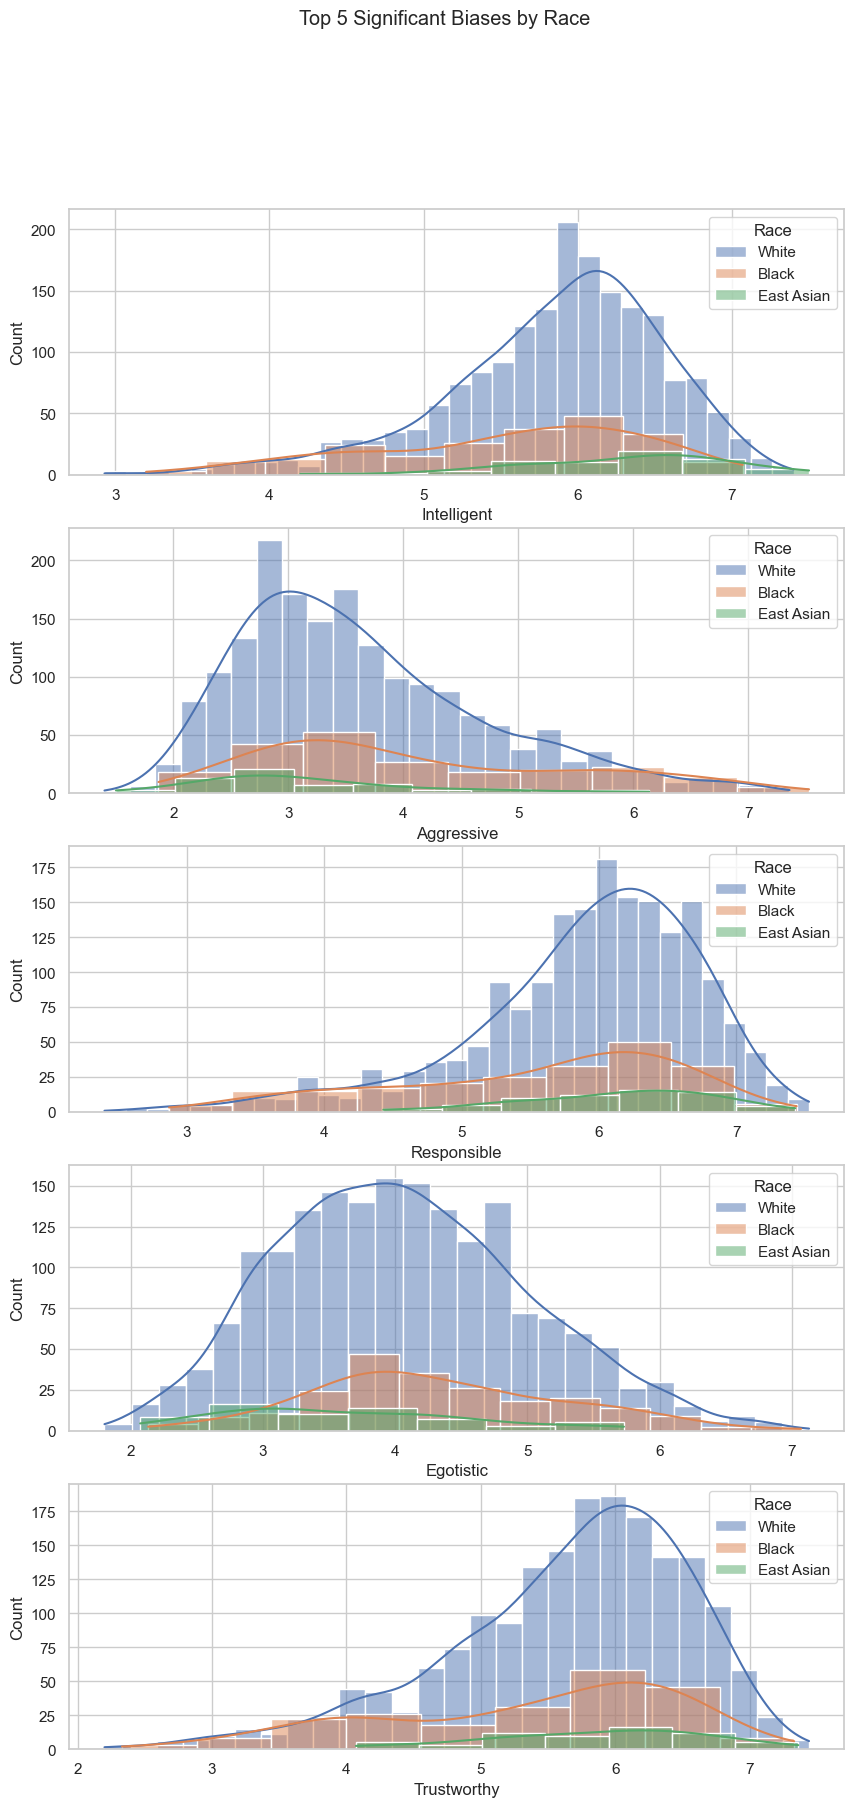

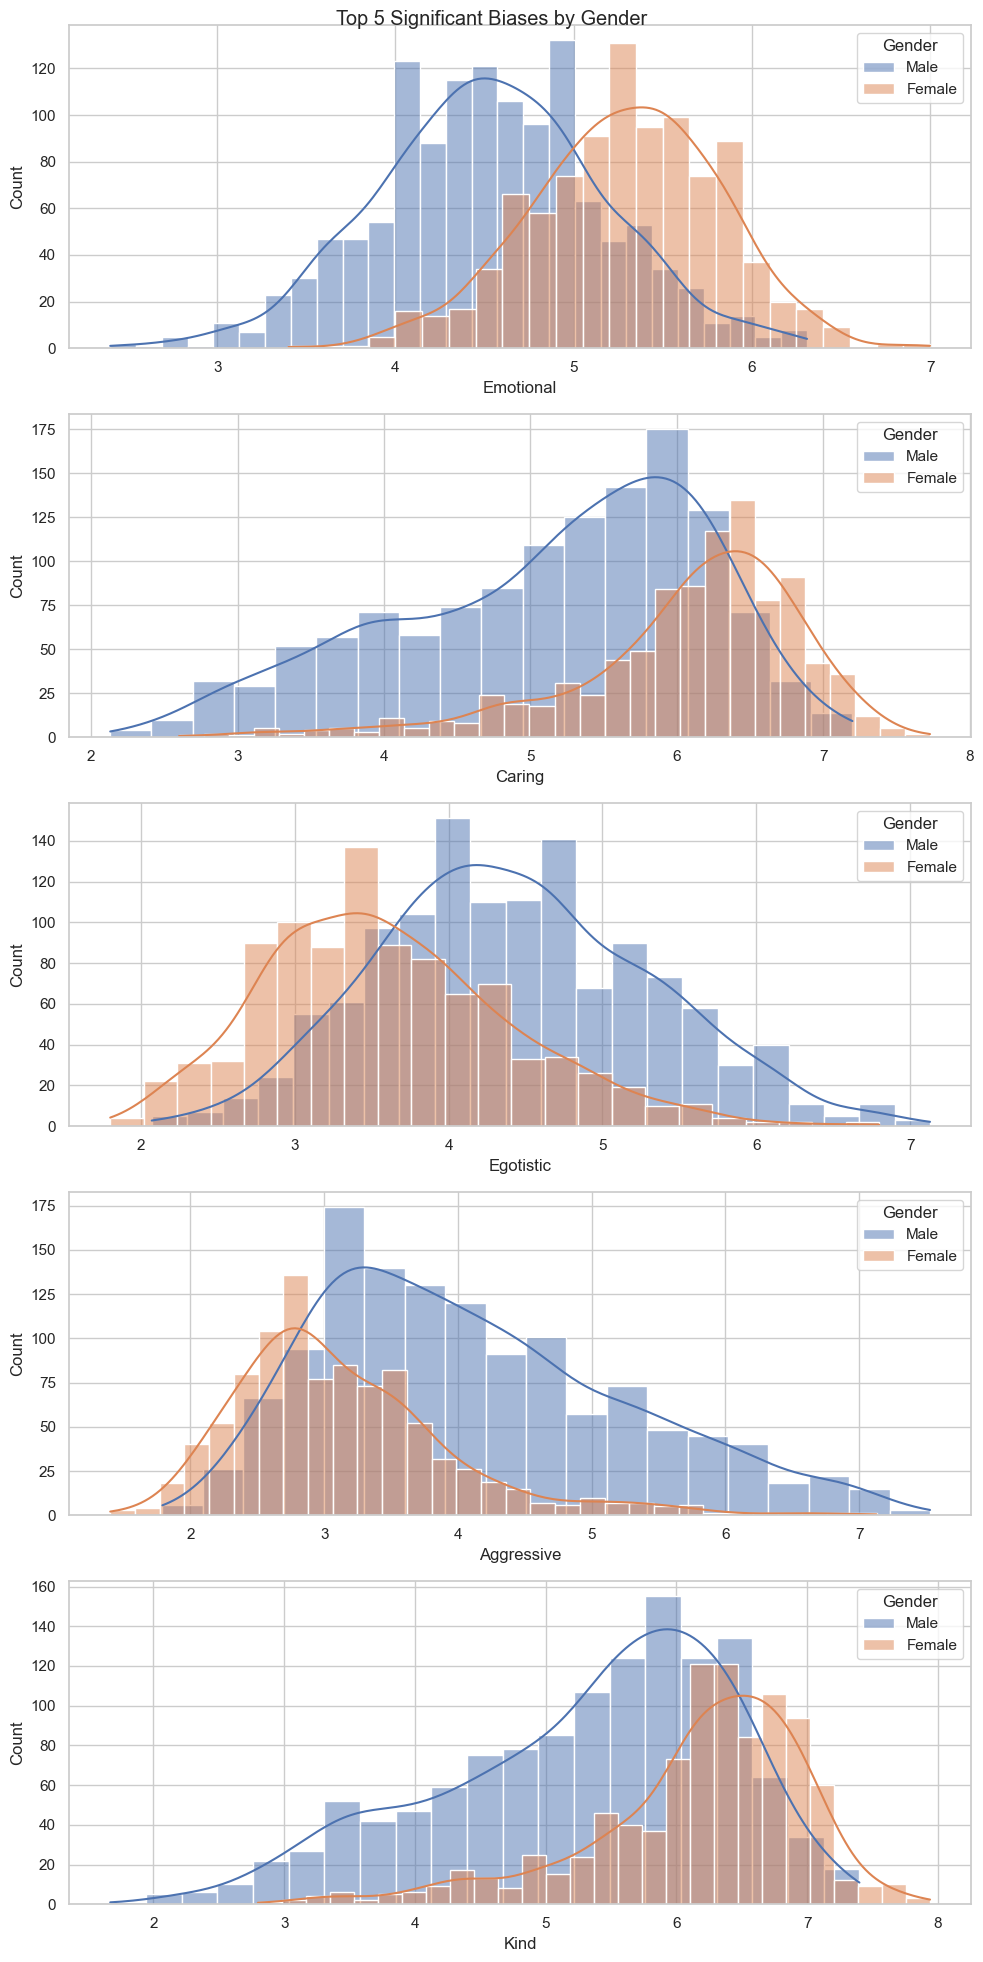

In [6]:
# Set the style for the plots
sns.set(style="whitegrid")

fig, axes = plt.subplots(5, 1, figsize=(10, 20)) 
fig.suptitle('Top 5 Significant Biases by Race')

for i, (trait, _) in enumerate(top_5_race_biases):
    for race_key, race_name in races.items():
        sns.histplot(filt_df[filt_df['Race'] == race_key][trait], kde=True, ax=axes[i], label=race_name)
    # axes[i].set_title(trait)
    axes[i].legend(title='Race')

fig, axes = plt.subplots(5, 1, figsize=(10, 20))  
fig.suptitle('Top 5 Significant Biases by Gender')

for i, (trait, _) in enumerate(top_5_gender_biases):
    sns.histplot(df[df['Gender'] == 1][trait], kde = True, ax = axes[i], label = 'Male')
    sns.histplot(df[df['Gender'] == 0][trait], kde = True, ax = axes[i], label = 'Female')
    # axes[i].set_title(trait)
    axes[i].legend(title='Gender')

# Display the plots
plt.tight_layout()
plt.show()


In [7]:
# Task 5: Identify Adverse Impacts Using the Four-Fifth Rule
qualified_rates = df.groupby('Race')['Qualified'].mean()
highest_rate = qualified_rates.max()
adverse_impact_races = qualified_rates[qualified_rates < highest_rate * 0.8].index.tolist()

print("ANOVA Results (Race and Traits): ", anova_results)
print("T-Test Results (Gender and Traits): ", t_test)
print("Top 5 Significant Racial Biases: ", top_5_race_biases)
print("Top 5 Significant Gender Biases: ", top_5_gender_biases)
print("Races with Adverse Impact: ", adverse_impact_races)


ANOVA Results (Race and Traits):  {'Confident': (0.5125652685487156, dict_values(['White', 'Black', 'East Asian'])), 'Egotistic': (1.4412211501758323e-07, dict_values(['White', 'Black', 'East Asian'])), 'Intelligent': (1.6711926732092035e-15, dict_values(['White', 'Black', 'East Asian'])), 'Kind': (0.00012878104123732718, dict_values(['White', 'Black', 'East Asian'])), 'Responsible': (8.005057161350754e-11, dict_values(['White', 'Black', 'East Asian'])), 'Trustworthy': (3.672594877204227e-06, dict_values(['White', 'Black', 'East Asian'])), 'Aggressive': (2.7078370672104353e-11, dict_values(['White', 'Black', 'East Asian'])), 'Caring': (0.00041893692225684995, dict_values(['White', 'Black', 'East Asian'])), 'Emotional': (0.02319487807768113, dict_values(['White', 'Black', 'East Asian'])), 'Friendly': (4.9774464052824096e-05, dict_values(['White', 'Black', 'East Asian'])), 'Sociable': (0.03449616164486741, dict_values(['White', 'Black', 'East Asian']))}
T-Test Results (Gender and Traits)